In [30]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [31]:
import tensorflow as tf
from tensorflow import keras

In [32]:
digit_mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = digit_mnist.load_data()

In [33]:
X_train_full = X_train_full.reshape((60000,28,28,1))
X_test = X_test.reshape((10000,28,28,1))

In [34]:
X_train_n = X_train_full /255.
X_test_n = X_test/255.

In [35]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [36]:
np.random.seed(42)
tf.random.set_seed(42)

In [53]:
model_a = keras.models.Sequential()
model_a.add(keras.layers.Conv2D(filters = 32, kernel_size =(3,3), strides =1 , padding ='valid', activation = 'relu', input_shape =(28,28,1)))
model_a.add(keras.layers.MaxPooling2D((2,2)))
model_a.add(keras.layers.Flatten())
model_a.add(keras.layers.Dense(200,activation="relu"))
model_a.add(keras.layers.Dense(100,activation="relu"))
model_a.add(keras.layers.Dense(10,activation="softmax"))

model_b = keras.models.Sequential()
model_b.add(keras.layers.Conv2D(filters = 64,kernel_size =(3,3),strides = 1,padding='valid',activation='relu',input_shape = (28,28,1)))
model_b.add(keras.layers.Flatten())
model_b.add(keras.layers.Dense(300, activation ="relu"))
model_b.add(keras.layers.Dense(100, activation = "relu"))
model_b.add(keras.layers.Dense(10, activation="softmax"))


In [54]:
model_a.summary()
model_b.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 200)               1081800   
_________________________________________________________________
dense_10 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 1,103,230
Trainable params: 1,103,230
Non-trainable params: 0
____________________________________________

In [56]:
model_a.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

model_b.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [57]:
model_history_a = model_a.fit(X_train, y_train, epochs=60,batch_size = 64,
                 validation_data=(X_valid,y_valid))
model_history_b = model_b.fit(X_train, y_train, epochs=60,batch_size = 64,
                 validation_data=(X_valid,y_valid))

Epoch 1/60
860/860 [==============================] - 13s 15ms/step - loss: 0.6970 - accuracy: 0.8172 - val_loss: 0.2790 - val_accuracy: 0.9206
Epoch 2/60
860/860 [==============================] - 12s 14ms/step - loss: 0.2660 - accuracy: 0.9222 - val_loss: 0.2165 - val_accuracy: 0.9370
Epoch 3/60
860/860 [==============================] - 12s 14ms/step - loss: 0.2105 - accuracy: 0.9378 - val_loss: 0.1689 - val_accuracy: 0.9504
Epoch 4/60
860/860 [==============================] - 12s 14ms/step - loss: 0.1737 - accuracy: 0.9490 - val_loss: 0.1495 - val_accuracy: 0.9554
Epoch 5/60
860/860 [==============================] - 12s 14ms/step - loss: 0.1485 - accuracy: 0.9565 - val_loss: 0.1333 - val_accuracy: 0.9596
Epoch 6/60
860/860 [==============================] - 13s 15ms/step - loss: 0.1298 - accuracy: 0.9616 - val_loss: 0.1145 - val_accuracy: 0.9662
Epoch 7/60
860/860 [==============================] - 12s 14ms/step - loss: 0.1143 - accuracy: 0.9663 - val_loss: 0.1045 - val_accuracy:

<function matplotlib.pyplot.show(close=None, block=None)>

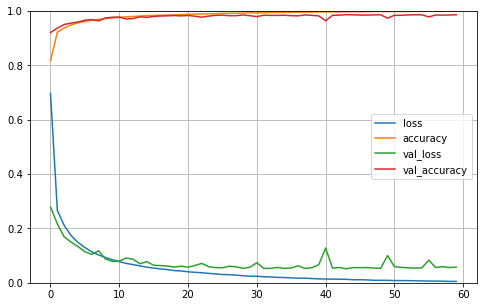

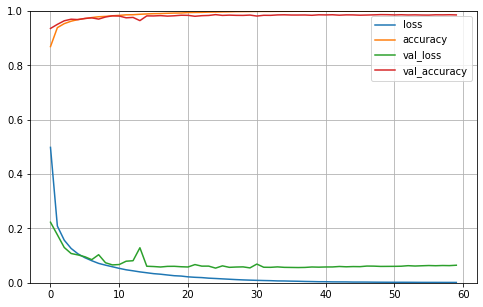

In [59]:
import pandas as pd

pd.DataFrame(model_history_a.history).plot(figsize =(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

pd.DataFrame(model_history_b.history).plot(figsize =(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

In [60]:
ev = model_a.evaluate(X_test_n, y_test)
ev = model_b.evaluate(X_test)

313/313 [==============================] - 0s 490us/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


In [61]:
ev

[0.0, 0.0]

In [62]:
X_new = X_test[:3]

In [68]:
y_pred = model_a.predict(X_new)
y_pred

y_pred = model_b.predict(X_new)
y_pred

array([[1.5805170e-11, 3.4849093e-10, 6.5551514e-10, 2.2816614e-06,
        1.7732206e-15, 8.0863753e-12, 4.5287912e-20, 9.9999774e-01,
        5.1096623e-12, 2.6515812e-08],
       [6.8929667e-12, 1.3307980e-10, 1.0000000e+00, 4.2409617e-11,
        5.6753403e-21, 4.7307006e-15, 1.4393800e-14, 2.9061426e-21,
        1.6790966e-10, 4.2609404e-22],
       [1.8153125e-08, 9.9994624e-01, 8.9601849e-07, 1.8890020e-08,
        3.7241862e-06, 4.2682307e-09, 3.5556923e-07, 1.3188801e-05,
        3.5507757e-05, 1.6118044e-10]], dtype=float32)

In [69]:
y_test[:3]

array([7, 2, 1], dtype=uint8)

AxesImage(54,36;334.8x217.44)


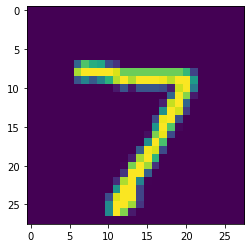

In [70]:
print(plt.imshow(X_test[0].reshape((28,28))))